In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import bayesianinference as bi


In [2]:
bi.__version__

'v0.24'

## Example: Effect of Screener Questions on Conversion metrics

* An advertiser can dropout when posting a job. How Screener Questions (SQ) affect the dropout rate? A new advertiser is fully converted if they finish posting the first job. It is a binary variable, whose distribution is completely determined by its mean. How does IQ affect this mean?
* Data is collected between 2019-02-01 and 2019-03-01.
    * SQ: screener questions, 1 if the advertiser was shown screener question when posting the first job, otherwise 0
    * full-conversion: 1 if the advertiser finished posting the first job

In [3]:
df = pd.read_csv("IQ_utility_conversion.csv")
metric, treatment = "full-conversion", "SQ"

# t means treatment (shown SQ), c means control (not shown SQ)
treatment_data = df[(df[treatment] == 1)][metric]
control_data = df[(df[treatment] == 0)][metric]


## Using PYMC3 to sample from posterior distributions

In [4]:
model = bi.BetaBinomial(treatment_data, control_data, alpha=1, beta=1)
model.draw()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4603.88draws/s]
The acceptance probability does not match the target. It is 0.8911172468846588, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4433.18draws/s]
The acceptance probability does not match the target. It is 0.8800097619397129, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8890933515431674, but should be close to 0.8. Try to increase the number of tuning steps.


In [5]:
model.summary_posterior_distributions()

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
treatment,0.887782,0.002318,0.000053,0.883257,0.892306,1800.018646,1.002247
control,0.890198,0.002290,0.000055,0.885559,0.894518,1785.041180,1.000184


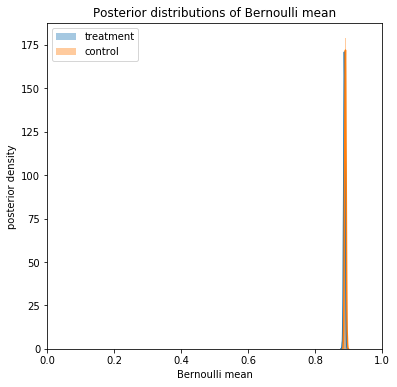

In [6]:
# plot posterior distributions
plt.figure(figsize=(6,6))
model.plot_posterior_distributions(title = "Posterior distributions of Bernoulli mean", xmin=0, xmax=1)


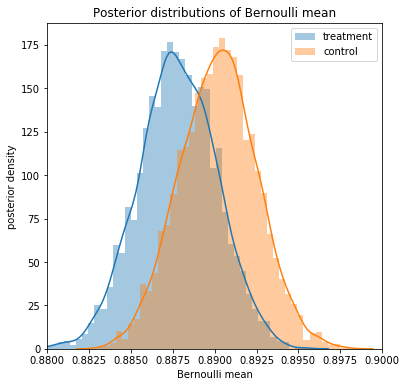

In [7]:
# plot posterior distributions: zoom in
plt.figure(figsize=(6,6))
model.plot_posterior_distributions(title = "Posterior distributions of Bernoulli mean", xmin=0.88, xmax=0.9)


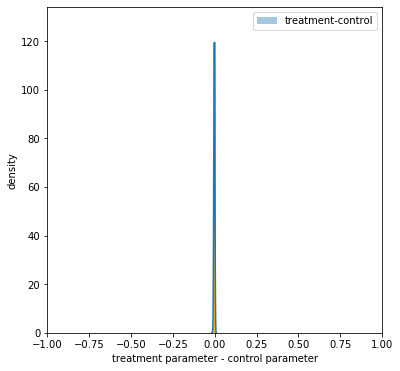

In [8]:
#plot distribution of difference in posterior mean
plt.figure(figsize=(6,6))
model.plot_distribution_of_diff(title = "Posterior distribution of difference in Bernoulli mean", 
                               xmin = -1, xmax = 1)

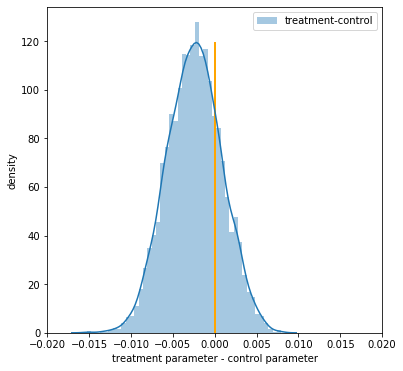

In [9]:
#plot distribution of difference in posterior mean: zoom in
plt.figure(figsize=(6,6))
model.plot_distribution_of_diff(title = "Posterior distribution of difference in Bernoulli mean", 
                               xmin = -0.02, xmax = 0.02)

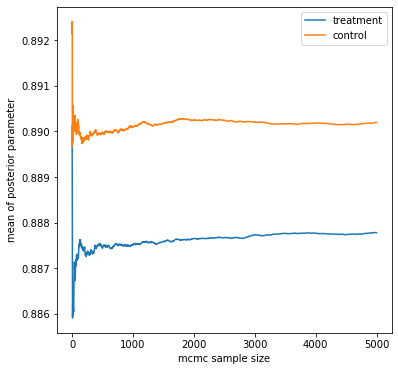

In [10]:
plt.figure(figsize=(6,6))
model.params_vs_mcmc_sample_size()

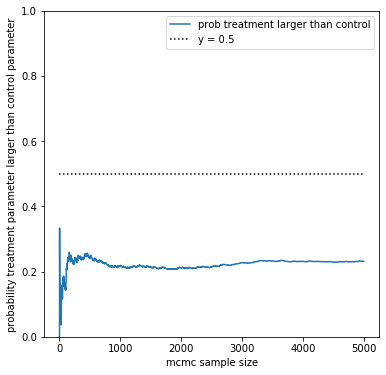

stabilized probability that treatment is larger than control : 0.2316


In [11]:
plt.figure(figsize=(6,6))
model.prob_treatment_larger_than_control_vs_mcmc_sample_size()

### Robustness against prior parameters

In [12]:
alpha_grid = range(1,21,2)
beta_grid = range(1,21,2)

probs = []
for alpha in alpha_grid:
    probs_sub = []
    for beta in beta_grid:
        print(alpha, beta)
        model = bi.BetaBinomial(treatment_data, control_data, alpha=alpha, beta=beta)
        model.draw()
        probs_sub.append(model.posterior_prob_treatment_larger_than_control())
    probs.append(probs_sub)


1 1


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4699.77draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4622.96draws/s]
The acceptance probability does not match the target. It is 0.8876954044646926, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8822303449997744, but should be close to 0.8. Try to increase the number of tuning steps.


1 3


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4530.78draws/s]
The acceptance probability does not match the target. It is 0.8971647889150582, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8794237206323557, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4479.18draws/s]
The acceptance probability does not match the target. It is 0.8839668020808162, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8949918799525707, but should be close to 0.8. 

1 5


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4614.90draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4475.17draws/s]
The acceptance probability does not match the target. It is 0.8899410428846348, but should be close to 0.8. Try to increase the number of tuning steps.


1 7


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3969.27draws/s]
The acceptance probability does not match the target. It is 0.8796689115850592, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8790182772787166, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4586.56draws/s]
The acceptance probability does not match the target. It is 0.8949605163831754, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8820751680781963, but should be close to 0.8. 

1 9


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4515.57draws/s]
The acceptance probability does not match the target. It is 0.8856252466650054, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8788557796900045, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4670.69draws/s]
The acceptance probability does not match the target. It is 0.8893225632531097, but should be close to 0.8. Try to increase the number of tuning steps.


1 11


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4159.28draws/s]
The acceptance probability does not match the target. It is 0.8914967156878876, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8790037334842234, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3477.89draws/s]
The acceptance probability does not match the target. It is 0.8869844408770853, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8917622208727894, but should be close to 0.8. 

1 13


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4311.70draws/s]
The acceptance probability does not match the target. It is 0.8837060037233382, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8884585191090846, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4500.32draws/s]
The acceptance probability does not match the target. It is 0.8990787405773132, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8839838186947159, but should be close to 0.8. 

1 15


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3860.97draws/s]
The acceptance probability does not match the target. It is 0.8839352402564337, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3644.24draws/s]
The acceptance probability does not match the target. It is 0.8929371452452296, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8844590942682786, but should be close to 0.8. Try to increase the number of tuning steps.


1 17


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3350.15draws/s]
The acceptance probability does not match the target. It is 0.8932375338090526, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8836107822445222, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4017.34draws/s]
The acceptance probability does not match the target. It is 0.9140667192014562, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.892579183763581, but should be close to 0.8. T

1 19


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3925.55draws/s]
The acceptance probability does not match the target. It is 0.8831112292005319, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3786.27draws/s]
The acceptance probability does not match the target. It is 0.9087650939534468, but should be close to 0.8. Try to increase the number of tuning steps.


3 1


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3907.75draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4222.95draws/s]


3 3


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4258.91draws/s]
The acceptance probability does not match the target. It is 0.8886715954364305, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.880622120378132, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4202.17draws/s]
The acceptance probability does not match the target. It is 0.8814786067414838, but should be close to 0.8. Try to increase the number of tuning steps.


3 5


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3959.53draws/s]
The acceptance probability does not match the target. It is 0.8947179430630563, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4124.47draws/s]


3 7


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3953.77draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4061.80draws/s]
The acceptance probability does not match the target. It is 0.9025057514534993, but should be close to 0.8. Try to increase the number of tuning steps.


3 9


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3954.76draws/s]
The acceptance probability does not match the target. It is 0.8809577033614359, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3925.26draws/s]
The acceptance probability does not match the target. It is 0.8860600816034734, but should be close to 0.8. Try to increase the number of tuning steps.


3 11


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4159.80draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4134.82draws/s]
The acceptance probability does not match the target. It is 0.9004674113568172, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8873531084400517, but should be close to 0.8. Try to increase the number of tuning steps.


3 13


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4055.09draws/s]
The acceptance probability does not match the target. It is 0.9097896559844085, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3892.73draws/s]


3 15


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4124.10draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3844.68draws/s]
The acceptance probability does not match the target. It is 0.8937839957739503, but should be close to 0.8. Try to increase the number of tuning steps.


3 17


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4250.24draws/s]
The acceptance probability does not match the target. It is 0.8901331630346538, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4124.83draws/s]
The acceptance probability does not match the target. It is 0.8892474891354352, but should be close to 0.8. Try to increase the number of tuning steps.


3 19


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4245.53draws/s]
The acceptance probability does not match the target. It is 0.8885271545282069, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4352.16draws/s]
The acceptance probability does not match the target. It is 0.9032710519572529, but should be close to 0.8. Try to increase the number of tuning steps.


5 1


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4733.46draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4297.77draws/s]
The acceptance probability does not match the target. It is 0.8923665619184976, but should be close to 0.8. Try to increase the number of tuning steps.


5 3


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3315.37draws/s]
The acceptance probability does not match the target. It is 0.8806317401452036, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4085.17draws/s]
The acceptance probability does not match the target. It is 0.8887847248341997, but should be close to 0.8. Try to increase the number of tuning steps.


5 5


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4117.92draws/s]
The acceptance probability does not match the target. It is 0.8791686174316852, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8870062145342689, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3802.99draws/s]


5 7


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4146.76draws/s]
The acceptance probability does not match the target. It is 0.8905735959152717, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8949242977890387, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3878.29draws/s]
The acceptance probability does not match the target. It is 0.8888628730018984, but should be close to 0.8. Try to increase the number of tuning steps.


5 9


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4077.31draws/s]
The acceptance probability does not match the target. It is 0.887959281570179, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8803123836247314, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3655.27draws/s]


5 11


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4032.58draws/s]
The acceptance probability does not match the target. It is 0.8913450914768387, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4083.89draws/s]
The acceptance probability does not match the target. It is 0.8798555312718946, but should be close to 0.8. Try to increase the number of tuning steps.


5 13


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4046.68draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3790.77draws/s]
The acceptance probability does not match the target. It is 0.8811837006538777, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8847621411663859, but should be close to 0.8. Try to increase the number of tuning steps.


5 15


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4004.83draws/s]
The acceptance probability does not match the target. It is 0.8833656908460636, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4067.68draws/s]
The acceptance probability does not match the target. It is 0.8814447077821437, but should be close to 0.8. Try to increase the number of tuning steps.


5 17


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3809.63draws/s]
The acceptance probability does not match the target. It is 0.8900942614809361, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8815020915004551, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4082.36draws/s]


5 19


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3927.21draws/s]
The acceptance probability does not match the target. It is 0.8973035670856098, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3275.67draws/s]
The acceptance probability does not match the target. It is 0.9012811016390465, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8786924631995416, but should be close to 0.8. Try to increase the number of tuning steps.


7 1


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3556.38draws/s]
The acceptance probability does not match the target. It is 0.8815398981320034, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3800.72draws/s]


7 3


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4117.36draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3846.19draws/s]
The acceptance probability does not match the target. It is 0.881083863248109, but should be close to 0.8. Try to increase the number of tuning steps.


7 5


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4180.64draws/s]
The acceptance probability does not match the target. It is 0.8989852412504121, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4216.22draws/s]
The acceptance probability does not match the target. It is 0.89457247317568, but should be close to 0.8. Try to increase the number of tuning steps.


7 7


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4705.58draws/s]
The acceptance probability does not match the target. It is 0.8864543251069151, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4121.49draws/s]
The acceptance probability does not match the target. It is 0.8853936413835114, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8876323440499561, but should be close to 0.8. Try to increase the number of tuning steps.


7 9


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4097.97draws/s]
The acceptance probability does not match the target. It is 0.893448451479054, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.89714545744243, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3301.33draws/s]
The acceptance probability does not match the target. It is 0.8808476971568923, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8790347863854685, but should be close to 0.8. Try

7 11


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3939.61draws/s]
The acceptance probability does not match the target. It is 0.8867549522441593, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3976.55draws/s]


7 13


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3513.33draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4162.58draws/s]
The acceptance probability does not match the target. It is 0.8989520926818986, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9005276066553743, but should be close to 0.8. Try to increase the number of tuning steps.


7 15


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4000.14draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4044.95draws/s]
The acceptance probability does not match the target. It is 0.8806742375214736, but should be close to 0.8. Try to increase the number of tuning steps.


7 17


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3853.32draws/s]
The acceptance probability does not match the target. It is 0.8919307596272271, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9004035870530009, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3845.19draws/s]
The acceptance probability does not match the target. It is 0.8804514188165921, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.880458984432348, but should be close to 0.8. T

7 19


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3224.79draws/s]
The acceptance probability does not match the target. It is 0.8803420954579696, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8892794760548265, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2923.11draws/s]
The acceptance probability does not match the target. It is 0.8831157498340618, but should be close to 0.8. Try to increase the number of tuning steps.


9 1


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4079.10draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3577.10draws/s]


9 3


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4120.96draws/s]
The acceptance probability does not match the target. It is 0.8893277077408683, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8832222006052388, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3481.74draws/s]


9 5


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4269.18draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3474.27draws/s]
The acceptance probability does not match the target. It is 0.8841827183361198, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8858566746328853, but should be close to 0.8. Try to increase the number of tuning steps.


9 7


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3514.00draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4117.36draws/s]
The acceptance probability does not match the target. It is 0.8825563431421932, but should be close to 0.8. Try to increase the number of tuning steps.


9 9


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3688.72draws/s]
The acceptance probability does not match the target. It is 0.8794776046320519, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4161.77draws/s]
The acceptance probability does not match the target. It is 0.8846297669215079, but should be close to 0.8. Try to increase the number of tuning steps.


9 11


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3184.12draws/s]
The acceptance probability does not match the target. It is 0.898420552317505, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3923.41draws/s]


9 13


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3992.29draws/s]
The acceptance probability does not match the target. It is 0.88953943682339, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4271.87draws/s]
The acceptance probability does not match the target. It is 0.8854546283335147, but should be close to 0.8. Try to increase the number of tuning steps.


9 15


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4251.83draws/s]
The acceptance probability does not match the target. It is 0.8824874652537575, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4235.81draws/s]
The acceptance probability does not match the target. It is 0.8831618854190042, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8900273668919357, but should be close to 0.8. Try to increase the number of tuning steps.


9 17


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3451.04draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4231.31draws/s]
The acceptance probability does not match the target. It is 0.8949305361723703, but should be close to 0.8. Try to increase the number of tuning steps.


9 19


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4021.99draws/s]
The acceptance probability does not match the target. It is 0.8877312279427684, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8942743724741754, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4077.02draws/s]
The acceptance probability does not match the target. It is 0.900461827140862, but should be close to 0.8. Try to increase the number of tuning steps.


11 1


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4124.65draws/s]
The acceptance probability does not match the target. It is 0.8811287923133733, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4095.21draws/s]


11 3


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4290.60draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4136.99draws/s]
The acceptance probability does not match the target. It is 0.8814688544891972, but should be close to 0.8. Try to increase the number of tuning steps.


11 5


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3922.66draws/s]
The acceptance probability does not match the target. It is 0.9053805383181255, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4045.23draws/s]


11 7


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4170.16draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4074.46draws/s]


11 9


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4165.64draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3998.85draws/s]
The acceptance probability does not match the target. It is 0.9078930395536096, but should be close to 0.8. Try to increase the number of tuning steps.


11 11


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3989.75draws/s]
The acceptance probability does not match the target. It is 0.8885058400587442, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9044408505324338, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4098.99draws/s]
The acceptance probability does not match the target. It is 0.8991803231187985, but should be close to 0.8. Try to increase the number of tuning steps.


11 13


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3979.34draws/s]
The acceptance probability does not match the target. It is 0.8876631339531953, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4144.89draws/s]
The acceptance probability does not match the target. It is 0.900935477030145, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8794328704603459, but should be close to 0.8. Try to increase the number of tuning steps.


11 15


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4261.10draws/s]
The acceptance probability does not match the target. It is 0.8897177397485204, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3945.89draws/s]
The acceptance probability does not match the target. It is 0.879287195106879, but should be close to 0.8. Try to increase the number of tuning steps.


11 17


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4212.38draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4206.99draws/s]
The acceptance probability does not match the target. It is 0.9046056102807692, but should be close to 0.8. Try to increase the number of tuning steps.


11 19


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4248.16draws/s]
The acceptance probability does not match the target. It is 0.8995442499690401, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4306.34draws/s]
The acceptance probability does not match the target. It is 0.8813093903954438, but should be close to 0.8. Try to increase the number of tuning steps.


13 1


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4129.43draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4173.22draws/s]
The acceptance probability does not match the target. It is 0.8859951128073613, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8948189818913603, but should be close to 0.8. Try to increase the number of tuning steps.


13 3


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4264.32draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4096.78draws/s]
The acceptance probability does not match the target. It is 0.8855294138334614, but should be close to 0.8. Try to increase the number of tuning steps.


13 5


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4189.26draws/s]
The acceptance probability does not match the target. It is 0.8790737735333499, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4121.48draws/s]


13 7


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4248.66draws/s]
The acceptance probability does not match the target. It is 0.8901166494581957, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4291.46draws/s]
The acceptance probability does not match the target. It is 0.8800432890741036, but should be close to 0.8. Try to increase the number of tuning steps.


13 9


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4199.72draws/s]
The acceptance probability does not match the target. It is 0.8912810854982789, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8790467831704601, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4138.11draws/s]


13 11


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4327.39draws/s]
The acceptance probability does not match the target. It is 0.8954603228041765, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4046.62draws/s]


13 13


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4339.56draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4169.50draws/s]
The acceptance probability does not match the target. It is 0.8986555261836809, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.88701513215021, but should be close to 0.8. Try to increase the number of tuning steps.


13 15


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4147.43draws/s]
The acceptance probability does not match the target. It is 0.8986500371498506, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3949.23draws/s]
The acceptance probability does not match the target. It is 0.892109256170759, but should be close to 0.8. Try to increase the number of tuning steps.


13 17


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4235.40draws/s]
The acceptance probability does not match the target. It is 0.8803914440449498, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4357.63draws/s]
The acceptance probability does not match the target. It is 0.8871333905257177, but should be close to 0.8. Try to increase the number of tuning steps.


13 19


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4271.80draws/s]
The acceptance probability does not match the target. It is 0.8903761413570584, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3948.94draws/s]
The acceptance probability does not match the target. It is 0.9005396405649362, but should be close to 0.8. Try to increase the number of tuning steps.


15 1


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4214.21draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4291.31draws/s]


15 3


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3968.65draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4329.40draws/s]


15 5


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4240.53draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4272.92draws/s]
The acceptance probability does not match the target. It is 0.8859695766486179, but should be close to 0.8. Try to increase the number of tuning steps.


15 7


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4390.97draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4118.30draws/s]


15 9


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4074.39draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3815.09draws/s]
The acceptance probability does not match the target. It is 0.9033449574666361, but should be close to 0.8. Try to increase the number of tuning steps.


15 11


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3959.69draws/s]
The acceptance probability does not match the target. It is 0.8853428444609108, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4355.07draws/s]
The acceptance probability does not match the target. It is 0.8994809029785322, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8790009903118066, but should be close to 0.8. Try to increase the number of tuning steps.


15 13


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3955.90draws/s]
The acceptance probability does not match the target. It is 0.8995960821241294, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9064265624101848, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3904.88draws/s]
The acceptance probability does not match the target. It is 0.8881332635389809, but should be close to 0.8. Try to increase the number of tuning steps.


15 15


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4203.43draws/s]
The acceptance probability does not match the target. It is 0.8826881905275988, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4198.51draws/s]
The acceptance probability does not match the target. It is 0.8861345652991679, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8890815402863962, but should be close to 0.8. Try to increase the number of tuning steps.


15 17


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4099.88draws/s]
The acceptance probability does not match the target. It is 0.897789228351796, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3661.65draws/s]
The acceptance probability does not match the target. It is 0.8987843976746122, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8840916996808247, but should be close to 0.8. Try to increase the number of tuning steps.


15 19


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3986.91draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3936.87draws/s]


17 1


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4077.73draws/s]
The acceptance probability does not match the target. It is 0.8975039758223294, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8860726716557848, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4257.33draws/s]
The acceptance probability does not match the target. It is 0.8866422842502781, but should be close to 0.8. Try to increase the number of tuning steps.


17 3


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4112.01draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3994.29draws/s]
The acceptance probability does not match the target. It is 0.8852267978998253, but should be close to 0.8. Try to increase the number of tuning steps.


17 5


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4147.10draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4182.22draws/s]
The acceptance probability does not match the target. It is 0.8831289997138627, but should be close to 0.8. Try to increase the number of tuning steps.


17 7


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4202.46draws/s]
The acceptance probability does not match the target. It is 0.8880430276790799, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3941.50draws/s]
The acceptance probability does not match the target. It is 0.8995269420168002, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8957881451425216, but should be close to 0.8. Try to increase the number of tuning steps.


17 9


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4002.17draws/s]
The acceptance probability does not match the target. It is 0.8904037753535838, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4171.81draws/s]
The acceptance probability does not match the target. It is 0.8847748267021635, but should be close to 0.8. Try to increase the number of tuning steps.


17 11


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4154.77draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4097.54draws/s]
The acceptance probability does not match the target. It is 0.8921244131145137, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.885308875984603, but should be close to 0.8. Try to increase the number of tuning steps.


17 13


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3804.92draws/s]
The acceptance probability does not match the target. It is 0.8855551134196912, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8797435032350472, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3796.83draws/s]


17 15


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4274.22draws/s]
The acceptance probability does not match the target. It is 0.8785924781175717, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4386.06draws/s]


17 17


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4124.75draws/s]
The acceptance probability does not match the target. It is 0.8884013643165971, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3932.64draws/s]
The acceptance probability does not match the target. It is 0.8994417718171205, but should be close to 0.8. Try to increase the number of tuning steps.


17 19


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3856.70draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4079.16draws/s]
The acceptance probability does not match the target. It is 0.8821437347712187, but should be close to 0.8. Try to increase the number of tuning steps.


19 1


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3529.37draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3524.90draws/s]


19 3


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2844.35draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3004.31draws/s]
The acceptance probability does not match the target. It is 0.879812246251727, but should be close to 0.8. Try to increase the number of tuning steps.


19 5


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3073.75draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4004.15draws/s]


19 7


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3882.83draws/s]
The acceptance probability does not match the target. It is 0.8808594704715587, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3815.64draws/s]


19 9


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3741.28draws/s]
The acceptance probability does not match the target. It is 0.878971343745716, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8929693651392541, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3903.42draws/s]
The acceptance probability does not match the target. It is 0.9008843349847961, but should be close to 0.8. Try to increase the number of tuning steps.


19 11


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3525.11draws/s]
The acceptance probability does not match the target. It is 0.8818567926813846, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8836155124755255, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3654.91draws/s]
The acceptance probability does not match the target. It is 0.8786747839511645, but should be close to 0.8. Try to increase the number of tuning steps.


19 13


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3046.02draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2609.16draws/s]


19 15


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3980.29draws/s]
The acceptance probability does not match the target. It is 0.8853839180042402, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3881.69draws/s]
The acceptance probability does not match the target. It is 0.8914311877231252, but should be close to 0.8. Try to increase the number of tuning steps.


19 17


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4063.82draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3789.07draws/s]
The acceptance probability does not match the target. It is 0.9079179576203562, but should be close to 0.8. Try to increase the number of tuning steps.


19 19


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3144.73draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Bernoulli mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3800.36draws/s]


In [13]:
robust_mat = pd.DataFrame(probs, columns =[str(beta) for beta in beta_grid])
robust_mat.index=alpha_grid
robust_mat.index.name ="alpha/beta"
robust_mat.reset_index()
robust_mat


,1,3,5,7,9,11,13,15,17,19
alpha/beta,,,,,,,,,,
1,0.2400,0.2428,0.2314,0.2360,0.2288,0.2256,0.2326,0.2312,0.2396,0.2332
3,0.2332,0.2308,0.2378,0.2554,0.2280,0.2324,0.2422,0.2316,0.2418,0.2274
5,0.2312,0.2346,0.2428,0.2354,0.2320,0.2412,0.2444,0.2354,0.2374,0.2370
7,0.2218,0.2258,0.2442,0.2340,0.2422,0.2424,0.2250,0.2336,0.2322,0.2330
9,0.2460,0.2436,0.2416,0.2210,0.2350,0.2332,0.2232,0.2426,0.2274,0.2452
11,0.2348,0.2356,0.2528,0.2374,0.2442,0.2292,0.2382,0.2250,0.2430,0.2248
13,0.2178,0.2370,0.2214,0.2386,0.2410,0.2374,0.2330,0.2256,0.2392,0.2346
15,0.2406,0.2452,0.2338,0.2444,0.2420,0.2404,0.2418,0.2136,0.2402,0.2242
17,0.2342,0.2352,0.2346,0.2252,0.2316,0.2330,0.2360,0.2296,0.2380,0.2308
